# Simulation of Complex Systems - Chapter 6
Artur Gasparyan

## Exercise 1

In [350]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import constants

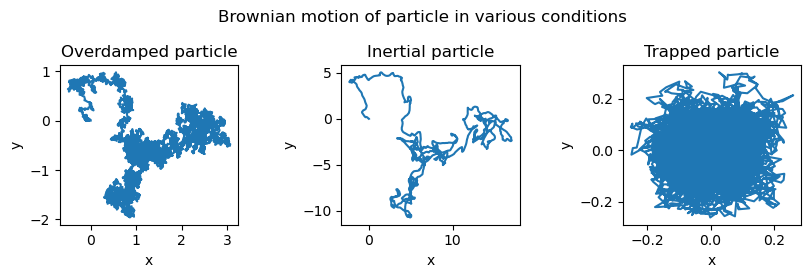

In [388]:
rng = np.random.default_rng()
n_steps = 10000
n_simulations = 1000
time_step = 0.03

absolute_temperature = 100
friction_coef = 1
mass = 1
optical_stiffness = 1

relaxation_time = mass/friction_coef
relaxation_lag = time_step / relaxation_time

fluctuation_size = math.sqrt(2*constants.Boltzmann*absolute_temperature*friction_coef)
fluctations = rng.normal(size=(n_simulations, n_steps, 2))/math.sqrt(2)   # Random 2D steps normalized to 1

x_overdamped = np.zeros((n_simulations, n_steps, 2))
x_inertial = np.zeros((n_simulations, n_steps, 2))
x_trapped = np.zeros((n_simulations, n_steps, 2))

for i in range(1, n_steps):
    x_overdamped[:, i, :] = x_overdamped[:, i-1, :] + fluctations[:, i, :]*time_step/(friction_coef*friction_coef)

for i in range(1, n_steps):
    x_inertial[:, i, :] = (
        x_inertial[:, i-1, :]*(2+relaxation_lag)/(1+relaxation_lag) -
        x_inertial[:, i-2, :]/(1+relaxation_lag) + 
        fluctations[:, i, :]/((1+relaxation_lag)*mass) * time_step**(3/2)
    )
    
for i in range(1, n_steps):
    x_trapped[:, i, :] = (
        x_trapped[:, i-1, :]*(1 - optical_stiffness/friction_coef*time_step) +
        fluctations[:, i, :]*time_step/(friction_coef*friction_coef)
    )
    
x_all = [x_overdamped, x_inertial, x_trapped]

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout(pad=4)
fig.suptitle("Brownian motion of particle in various conditions")
titles = ["Overdamped particle", "Inertial particle", "Trapped particle"]

for x, ax, title in zip(x_all, axes, titles):
    ax.plot(x[0, :, 0], x[0, :, 1])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)

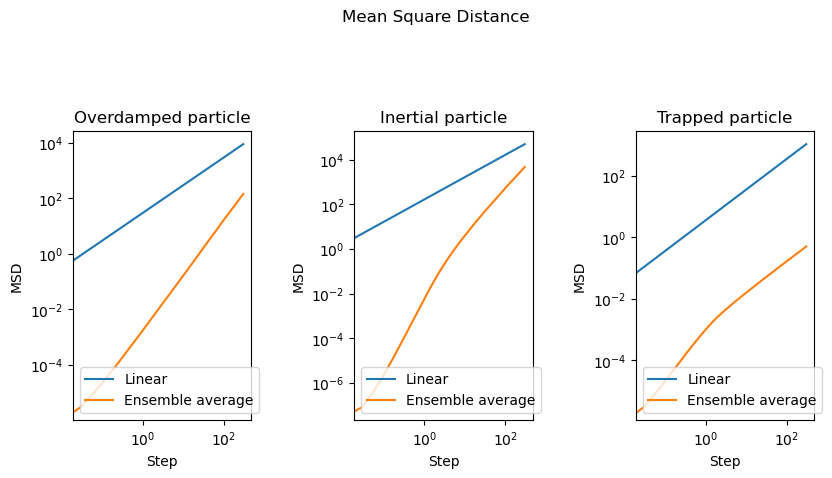

In [391]:
def get_metrics_from_x(x, n_steps):
    lin_step = np.mean(np.mean(np.linalg.norm(x[:, :x.shape[1]//4, :], axis=2), axis=1))
    linear = lin_step*np.arange(n_steps)
    dist = np.linalg.norm(x, axis=2)  # x0 is always (0, 0)
    sqr_dist = dist**2
    msd = np.cumsum(sqr_dist, axis=1)
    emsd = np.mean(msd, axis=0) / (n_steps*time_step)
    
    return {"dist": dist, "sqr_dist": sqr_dist, "msd": msd, "emsd": emsd, "linear": linear}

metrics_overdamped = get_metrics_from_x(x_overdamped, n_steps)
metrics_inertial = get_metrics_from_x(x_inertial, n_steps)
metrics_trapped = get_metrics_from_x(x_trapped, n_steps)
metrics_all = [metrics_overdamped, metrics_inertial, metrics_trapped]
titles = ["Overdamped particle", "Inertial particle", "Trapped particle"]

fig, axes = plt.subplots(1, 3, figsize=(9, 5))
fig.suptitle("Mean Square Distance")
fig.tight_layout(pad=4)

t = np.arange(n_steps)*time_step
for metric, ax, title in zip(metrics_all, axes, titles):

    ax.plot(t, metric["linear"])
    ax.plot(t, metric["emsd"])
    ax.legend(["Linear", "Ensemble average"])
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel("Step")
    ax.set_ylabel("MSD")





